Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load the data
fuel_data = pd.read_csv('Fuel_Consumption_2000-2022.csv')

In [25]:
# Showing the first few rows of the dataset
print(fuel_data.head())

   YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0    X               9.2             6.7              8.1          35   
1    X               8.5             6.5              7.6          37   
2    Z              12.2             7.4             10.0          28   
3    Z              13.4             9.2             11.5          25   
4    X              10.0             7.0              8.6          33   

   EMISSIONS  
0        186  
1        175  
2        230  
3        264  
4        198  


In [23]:
# Showing a summary of data
print(fuel_data.describe())

               YEAR   ENGINE SIZE     CYLINDERS  FUEL CONSUMPTION  \
count  22556.000000  22556.000000  22556.000000      22556.000000   
mean    2011.554442      3.356646      5.854141         12.763513   
std        6.298269      1.335425      1.819597          3.500999   
min     2000.000000      0.800000      2.000000          3.500000   
25%     2006.000000      2.300000      4.000000         10.400000   
50%     2012.000000      3.000000      6.000000         12.300000   
75%     2017.000000      4.200000      8.000000         14.725000   
max     2022.000000      8.400000     16.000000         30.600000   

       HWY (L/100 km)  COMB (L/100 km)    COMB (mpg)     EMISSIONS  
count    22556.000000     22556.000000  22556.000000  22556.000000  
mean         8.919126        11.034341     27.374534    250.068452  
std          2.274764         2.910920      7.376982     59.355276  
min          3.200000         3.600000     11.000000     83.000000  
25%          7.300000         9.1

In [7]:
# getting info of data
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [8]:
# Selecting only numeric columns for correlation analysis
numeric_data = fuel_data.select_dtypes(include=['float64', 'int64'])

print("\nCorrelation Matrix:")
print(numeric_data.corr())


Correlation Matrix:
                      YEAR  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  \
YEAR              1.000000    -0.077782  -0.072607         -0.098631   
ENGINE SIZE      -0.077782     1.000000   0.913377          0.821605   
CYLINDERS        -0.072607     0.913377   1.000000          0.794943   
FUEL CONSUMPTION -0.098631     0.821605   0.794943          1.000000   
HWY (L/100 km)   -0.007471     0.749394   0.698344          0.942351   
COMB (L/100 km)  -0.068020     0.807316   0.771587          0.992960   
COMB (mpg)        0.079989    -0.755002  -0.714215         -0.921361   
EMISSIONS        -0.047869     0.821285   0.802176          0.919101   

                  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  EMISSIONS  
YEAR                   -0.007471        -0.068020    0.079989  -0.047869  
ENGINE SIZE             0.749394         0.807316   -0.755002   0.821285  
CYLINDERS               0.698344         0.771587   -0.714215   0.802176  
FUEL CONSUMPTION        0.9423

In [9]:
# Skewness of data
print("\nSkewness:")
print(numeric_data.skew())


Skewness:
YEAR               -0.076020
ENGINE SIZE         0.631264
CYLINDERS           0.911295
FUEL CONSUMPTION    0.760824
HWY (L/100 km)      0.936619
COMB (L/100 km)     0.817065
COMB (mpg)          1.172800
EMISSIONS           0.534641
dtype: float64


In [10]:
print("\nKurtosis:")
print(numeric_data.kurtosis())


Kurtosis:
YEAR               -1.105442
ENGINE SIZE        -0.394947
CYLINDERS           1.198484
FUEL CONSUMPTION    1.104621
HWY (L/100 km)      1.149392
COMB (L/100 km)     1.054642
COMB (mpg)          3.643618
EMISSIONS           0.615430
dtype: float64


In [16]:
# Function for Line Graph - Average CO2 Emissions Over the Years

def plot_avg_emissions_over_years(fuel_data):

    """Plot the average CO2 emissions over the years (2000-2022)."""

    # Group the data by year and calculate the mean emissions
    yearly_emissions_avg = fuel_data.groupby('YEAR')['EMISSIONS'].mean()

    # Creating a line plot
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_emissions_avg.index, yearly_emissions_avg.values, marker='o')

    # Adding titles
    plt.title('Average CO2 Emissions Over the Years (2000-2022)')
    plt.xlabel('Year')
    plt.ylabel('Average CO2 Emissions (g/km)')

    # Displaying grid
    plt.grid(True)

    # Adjusting layout
    plt.tight_layout()

    # Showing the plot
    plt.show()

    return fuel_data

In [12]:
# Function for Scatter Plot - Engine Size vs. CO2 Emissions

def plot_engine_size_vs_emissions(fuel_data):

    """Plot a scatter plot showing engine size against CO2 emissions."""

    # Create a scatter plot to visualize the relationship between engine size and emissions
    plt.figure(figsize=(10, 6))
    plt.scatter(fuel_data['ENGINE SIZE'], fuel_data['EMISSIONS'], alpha=0.5, color='purple')

    # Adding titles
    plt.title('Engine Size vs. CO2 Emissions')
    plt.xlabel('Engine Size (L)')
    plt.ylabel('CO2 Emissions (g/km)')

    # Displaying grid
    plt.grid(True)

    # Adjusting layout
    plt.tight_layout()

    # Show the plot
    plt.show()


In [13]:
# Function for Box Plot - Combined Fuel Consumption by Fuel Type

def plot_fuel_consumption_by_fuel_type(fuel_data):

    """Plot a box plot showing combined fuel consumption by fuel type."""

    # Create a box plot to visualize the distribution of fuel consumption by fuel type
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=fuel_data, x='FUEL', y='COMB (L/100 km)', palette="muted")

    # Adding titles
    plt.title('Combined Fuel Consumption by Fuel Type')
    plt.xlabel('Fuel Type')
    plt.ylabel('Combined Fuel Consumption (L/100 km)')

    # Rotating x-axis labels
    plt.xticks(rotation=45)

    # Adjusting layout
    plt.tight_layout()

    # Show the plot
    plt.show()

Main Function

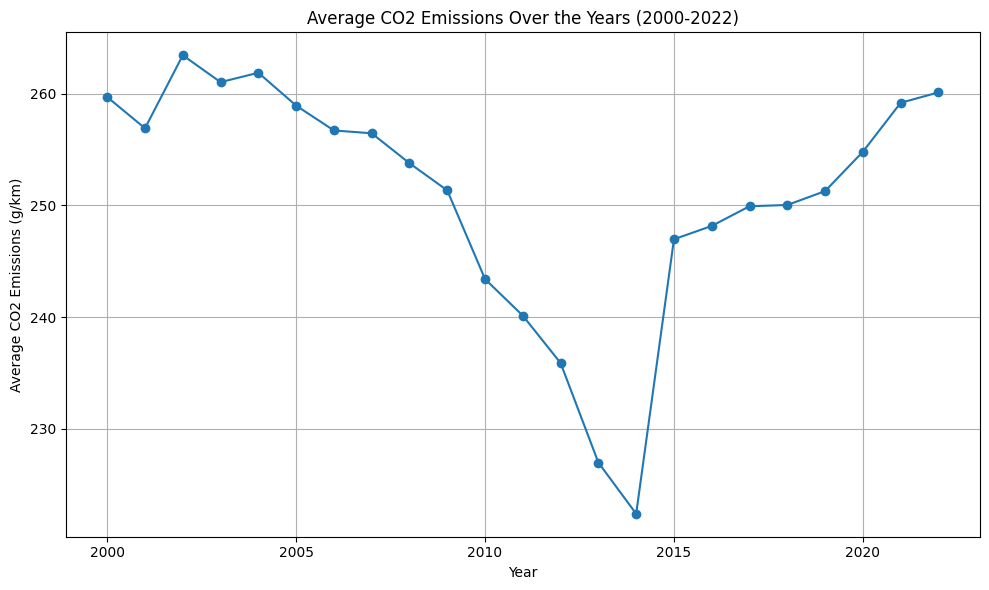

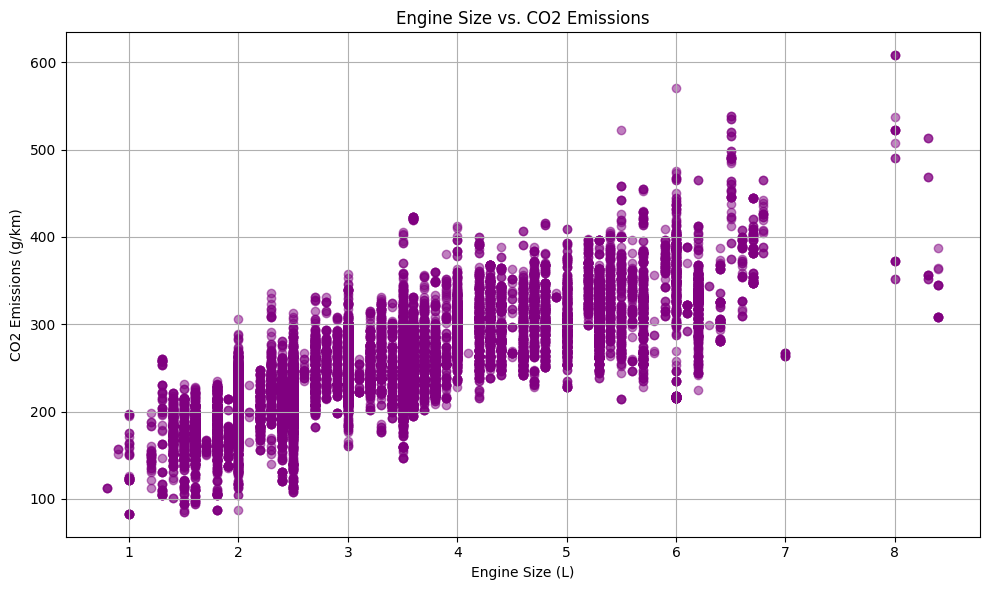

<ipython-input-13-aaccf89faa54>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fuel_data, x='FUEL', y='COMB (L/100 km)', palette="muted")


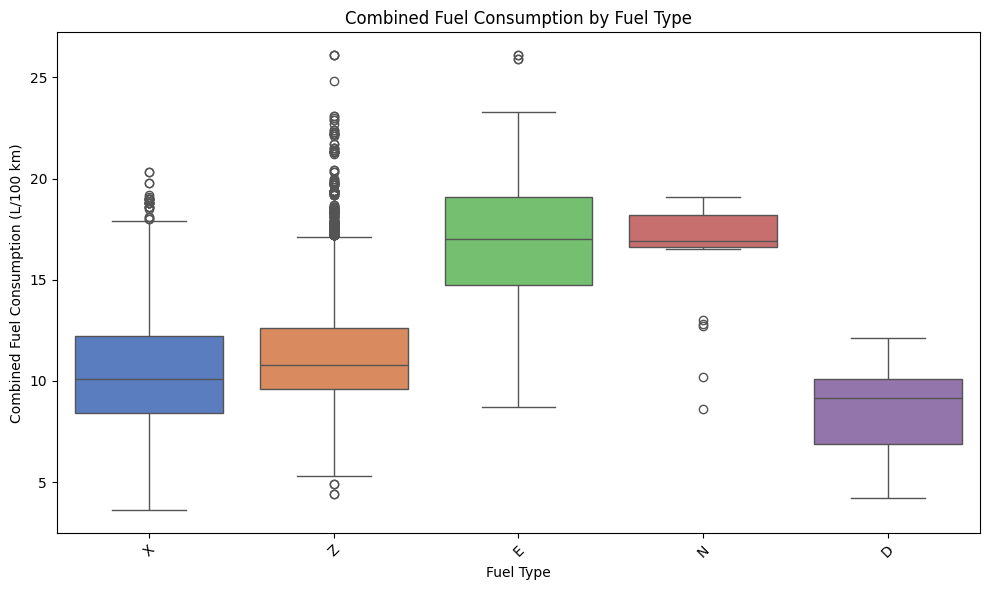

In [15]:
# Calling the main
if __name__ == "__main__":

    # Calling for plots
    plot_avg_emissions_over_years(fuel_data)
    plot_engine_size_vs_emissions(fuel_data)
    plot_fuel_consumption_by_fuel_type(fuel_data)